# Unit 5 - Financial Planning


In [4]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [5]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [6]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [7]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/bitcoin/?converty=USD"
eth_url = "https://api.alternative.me/v2/ticker/ethereum/?converty=USD"

In [9]:
# Fetch current BTC price
response_btc = requests.get(btc_url)
btc_data = response_btc.json()
btc_price = btc_data["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
response_eth = requests.get(eth_url)
eth_data = response_eth.json()
eth_price = eth_data["data"]["1027"]["quotes"]["USD"]["price"]


# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $73900.80
The current value of your 5.3 ETH is $12894.95


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [17]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [18]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [19]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2021-04-16", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio

AGG                                      SPY  \
                             open     high    low   close   volume    open   
time                                                                         
2021-04-16 00:00:00-04:00  114.56  114.665  114.5  114.54  3488514  417.25   

                                                             
                             high     low   close    volume  
time                                                         
2021-04-16 00:00:00-04:00  417.91  415.73  417.31  66624780

In [20]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio["AGG"]["close"][0]
spy_close_price = df_portfolio["SPY"]["close"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.54
Current SPY closing price: $417.31


In [21]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20865.50
The current value of your 200 AGG shares is $22908.00


### Savings Health Analysis

In [27]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
total_crypto = my_btc_value + my_eth_value
total_shares = my_spy_value + my_agg_value

savings_dict = {
    "amount": [total_crypto, total_shares]
}

df_savings = pd.DataFrame(savings_dict, index=["crypto", "shares"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,86795.753
shares,43773.500


<AxesSubplot:title={'center':'Compostion of Personal Savings'}, ylabel='amount'>

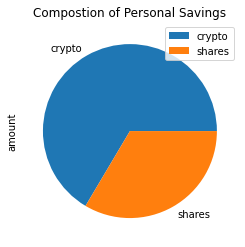

In [32]:
# Plot savings pie chart
df_savings.plot(kind="pie", y="amount", title="Compostion of Personal Savings")

In [33]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto + total_shares

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations! You have reached this financial goal of having enough savings in your emergency fund.")
elif total_savings < emergency_fund:
    remaining = emergency_fund - total_savings
    print(f"You are ${remaining} away from reaching the goal of havings enough savings in your emergency fund.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [48]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-04-16', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-04-16', tz='America/New_York').isoformat()

In [61]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

# Display sample data
df_stock_data.head()

AGG                                         \
                             open      high      low    close     volume   
time                                                                       
2017-04-26 00:00:00-04:00  108.85  108.9700  108.770  108.970  2679957.0   
2017-04-27 00:00:00-04:00  108.94  109.1000  108.910  109.050  1249545.0   
2017-04-28 00:00:00-04:00  108.98  109.2500  108.910  109.250  2722695.0   
2017-05-01 00:00:00-04:00  108.86  108.9599  108.620  108.735  2335646.0   
2017-05-02 00:00:00-04:00  108.68  108.9400  108.679  108.890  2570794.0   

                              SPY                                       
                             open    high      low   close      volume  
time                                                                    
2017-04-26 00:00:00-04:00     NaN     NaN      NaN     NaN         NaN  
2017-04-27 00:00:00-04:00  238.78  238.95  237.980  238.61  39577860.0  
2017-04-28 00:00:00-04:00  238.90  238.93  237.930  238.10  42264701.0  
2017-05-01 00:00:00-04:00  238.69  239.17  238.195  238.65  38750688.0  
2017-05-02 00:00:00-04:00  238.84  238.98  238.300  238.79  39563850.0

In [62]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data=df_stock_data,
    weights = [0.4,0.6],
    num_simulation=500,
    num_trading_days=30*252
)

In [63]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                         \
                             open      high      low    close     volume   
time                                                                       
2017-04-26 00:00:00-04:00  108.85  108.9700  108.770  108.970  2679957.0   
2017-04-27 00:00:00-04:00  108.94  109.1000  108.910  109.050  1249545.0   
2017-04-28 00:00:00-04:00  108.98  109.2500  108.910  109.250  2722695.0   
2017-05-01 00:00:00-04:00  108.86  108.9599  108.620  108.735  2335646.0   
2017-05-02 00:00:00-04:00  108.68  108.9400  108.679  108.890  2570794.0   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2017-04-26 00:00:00-04:00          NaN     NaN     NaN      NaN     NaN   
2017-04-27 00:00:00-04:00     0.000734  238.78  238.95  237.980  238.61   
2017-04-28 00:00:00-04:00     0.001834  238.90  238.93  237.930  238.10   
2017-05-01 00:00:00-04:00    -0.004714  238.69  239.17  238.195  238.65   
2017-05-02 00:00:00-04:00     0.001425  238.84  238.98  238.300  238.79   

                                                    
                               volume daily_return  
time                                                
2017-04-26 00:00:00-04:00         NaN          NaN  
2017-04-27 00:00:00-04:00  39577860.0          NaN  
2017-04-28 00:00:00-04:00  42264701.0    -0.002137  
2017-05-01 00:00:00-04:00  38750688.0     0.002310  
2017-05-02 00:00:00-04:00  39563850.0     0.000587

In [64]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002515,0.996225,1.011888,1.008105,0.995193,0.997567,1.006581,0.997230,0.990667,1.006247,...,1.013652,0.995084,0.996770,1.016378,0.997017,1.010677,1.012585,1.004295,1.001486,0.993268
2,1.005092,0.995204,1.028053,1.010882,0.993908,0.983184,1.007397,0.998699,0.999017,0.997587,...,1.027920,0.997921,0.997724,1.024744,0.979956,1.021403,1.020509,0.990765,1.009183,1.002484
3,0.997780,0.989473,1.025560,1.005424,0.991836,0.993429,1.009253,0.986001,1.000175,0.980828,...,1.033210,0.992343,1.002324,1.037368,0.958258,1.023177,1.010222,0.985591,1.014827,0.998096
4,0.998707,0.985685,1.026496,1.005115,0.994655,0.983740,1.011747,0.995489,1.010757,0.987639,...,1.048929,1.004976,1.016407,1.023692,0.963204,1.038006,1.010449,0.985519,1.016787,0.994134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.156580,12.239918,14.458574,23.474166,1.107821,35.833544,32.117758,9.737954,23.323704,11.891608,...,28.265994,16.663314,26.263854,24.826849,12.211801,3.915998,16.158953,14.487077,22.386352,62.750341
7557,5.209782,12.227343,14.490376,23.761692,1.101410,36.280908,32.255296,9.776440,23.302134,11.793223,...,28.155510,16.335034,26.240650,25.093458,12.107789,3.918151,16.301626,14.653895,22.817680,63.274922
7558,5.204079,12.223083,14.431618,23.804426,1.097081,36.454428,32.361873,9.788792,23.249906,11.829814,...,28.226923,16.408015,26.121055,25.217062,11.990205,3.958450,16.498767,14.662333,22.879394,61.811099
7559,5.165505,12.367028,14.427669,24.084681,1.083917,36.346773,32.254876,9.818985,23.439901,11.784156,...,27.808045,16.393452,26.196695,25.108122,12.019441,3.950289,16.717382,14.654418,22.866137,61.898037


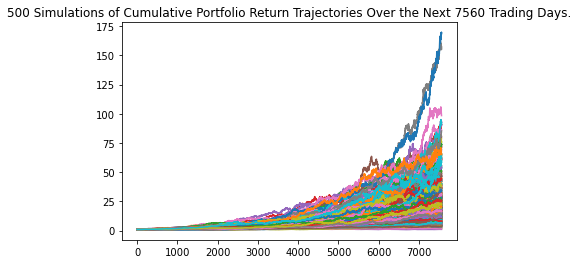

In [65]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

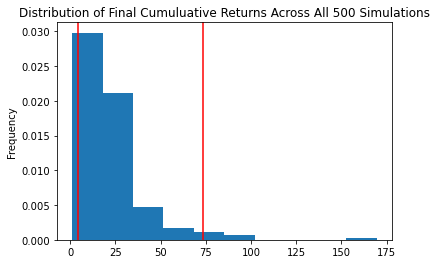

In [66]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

### Retirement Analysis

In [67]:
# Fetch summary statistics from the Monte Carlo simulation results
return_stats = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
return_stats

count           500.000000
mean             22.306668
std              18.484858
min               1.084272
25%              11.473728
50%              17.862636
75%              26.770830
max             169.442642
95% CI Lower      4.049642
95% CI Upper     73.518264
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [68]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(return_stats[-2]*initial_investment,2)
ci_upper = round(return_stats[-1]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $80992.84 and $1470365.27


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [70]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(return_stats[-2]*initial_investment,2)
ci_upper = round(return_stats[-1]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $121489.26 and $2205547.91


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [72]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data=df_stock_data,
    weights = [0.4,0.6],
    num_simulation=500,
    num_trading_days=5*252
)

In [73]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998211,1.005493,1.004964,1.005377,0.984755,1.000306,0.990629,0.993194,0.994471,0.995371,...,0.996635,0.988152,1.003640,0.997728,0.996280,1.004220,1.000653,1.009727,1.014091,0.999443
2,0.982543,1.006240,0.999772,0.995000,0.992649,1.011333,0.975938,0.993906,1.001270,0.990981,...,1.002104,0.992214,1.003726,0.991396,0.998920,1.002497,1.005210,1.005007,1.021188,0.997281
3,0.976928,1.006816,1.009119,0.996306,0.993523,1.004119,0.972077,0.992614,1.010094,0.993018,...,1.001151,0.994808,0.996040,1.003943,1.005153,0.999449,1.013105,1.003528,1.031779,0.991922
4,0.982677,1.000578,1.011401,0.988774,0.982565,1.003177,0.986041,0.996492,0.997080,0.993400,...,1.002150,0.995892,1.003172,0.991080,1.018423,0.999490,1.015526,1.015609,1.049959,0.988434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.791440,1.463012,1.963754,1.227086,1.848927,1.237660,1.241051,1.494618,1.708714,0.995734,...,1.629136,1.268391,1.569745,1.362659,2.167479,1.347933,1.212808,1.499454,2.165152,1.263157
1257,1.810764,1.463716,1.972201,1.211064,1.863372,1.239131,1.229957,1.491729,1.699411,0.997742,...,1.615253,1.280385,1.574428,1.368363,2.195009,1.350318,1.203057,1.502169,2.159656,1.251399
1258,1.808607,1.450850,1.996722,1.218378,1.862859,1.217116,1.237648,1.487487,1.707842,0.991645,...,1.604920,1.278005,1.580560,1.362022,2.217017,1.365290,1.213734,1.503791,2.192007,1.261601
1259,1.801340,1.454086,1.991839,1.215120,1.849182,1.229622,1.225084,1.493323,1.697967,0.980820,...,1.615038,1.272740,1.595689,1.361656,2.189600,1.349979,1.216181,1.505509,2.203637,1.270013


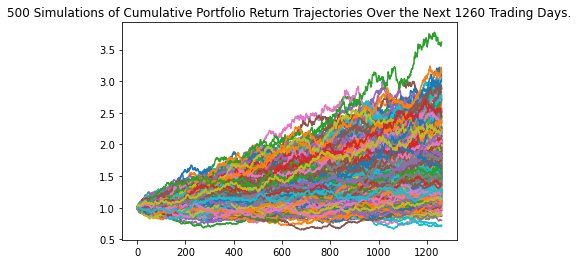

In [74]:
# Plot simulation outcomes
line_plot = MC_five_year.plot_simulation()

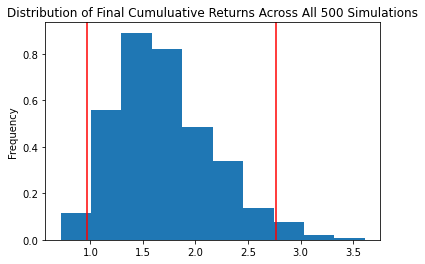

In [76]:
# Plot probability distribution and confidence intervals
dist_plot = MC_five_year.plot_distribution()

In [87]:
# Fetch summary statistics from the Monte Carlo simulation results
return_stats_5yr = MC_five_year.summarize_cumulative_return()

# Print summary statistics
return_stats_5yr

count           500.000000
mean              1.703146
std               0.462879
min               0.715216
25%               1.386232
50%               1.636250
75%               1.970572
max               3.612712
95% CI Lower      0.966763
95% CI Upper      2.764957
Name: 1260, dtype: float64

In [88]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(return_stats_5yr[-2]*initial_investment,2)
ci_upper_five = round(return_stats_5yr[-1]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $58005.78 and $165897.45


### Ten Years Retirement Option

In [81]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data=df_stock_data,
    weights = [0.4,0.6],
    num_simulation=500,
    num_trading_days=10*252
)

In [82]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001078,0.992150,1.003038,0.988525,0.997894,0.996274,1.004514,0.998791,1.006297,1.002024,...,0.995127,0.990429,0.994836,1.012648,0.987661,1.006907,1.002626,1.000035,1.001091,1.002048
2,1.013809,0.989703,1.001133,0.986122,0.997607,0.999393,0.995343,1.003630,1.009515,1.000794,...,0.982303,0.994366,1.000435,1.015965,0.993749,1.006914,1.001441,1.003756,1.015248,0.996770
3,1.014711,0.987188,1.000603,0.976483,0.997276,0.999743,1.009016,0.998661,1.010158,0.995172,...,0.984958,1.002229,1.014698,1.006988,1.006652,1.009129,0.991740,1.010405,1.026356,0.998583
4,1.012774,0.990772,1.002174,0.978869,0.983111,1.010516,1.009279,0.990164,1.003365,1.010081,...,0.989041,0.998325,0.999993,1.013925,0.988121,1.024578,0.989110,1.014103,1.011775,1.010947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.963816,2.028931,4.040450,3.215440,2.523633,2.525935,2.340074,2.485175,1.374877,2.211642,...,3.922104,2.131478,2.681848,2.662198,1.334672,3.822325,2.817968,3.383793,2.743480,2.871019
2517,1.968099,2.047608,4.050501,3.220319,2.539142,2.544248,2.366119,2.446735,1.365833,2.192935,...,3.910052,2.153961,2.645833,2.634824,1.347847,3.790109,2.818448,3.419338,2.737845,2.853484
2518,1.964160,2.036118,4.061678,3.204186,2.498327,2.582581,2.341269,2.468984,1.371544,2.188637,...,3.987577,2.170880,2.642923,2.609014,1.350886,3.761787,2.824073,3.420951,2.776396,2.869024
2519,1.953421,2.044868,4.091732,3.160878,2.549267,2.611872,2.341445,2.445453,1.363541,2.187086,...,4.037278,2.184241,2.663106,2.599166,1.341433,3.798759,2.834140,3.443631,2.748376,2.860014


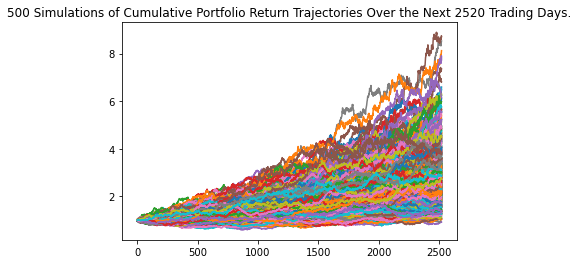

In [83]:
# Plot simulation outcomes
line_plot = MC_ten_year.plot_simulation()

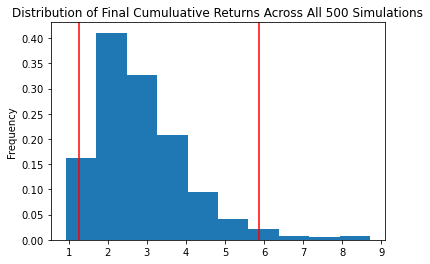

In [84]:
# Plot probability distribution and confidence intervals
dist_plot = MC_ten_year.plot_distribution()

In [85]:
# Fetch summary statistics from the Monte Carlo simulation results
return_stats_10yr = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
return_stats_10yr

count           500.000000
mean              2.878475
std               1.195412
min               0.922338
25%               2.107254
50%               2.602164
75%               3.466856
max               8.714270
95% CI Lower      1.261984
95% CI Upper      5.875492
Name: 2520, dtype: float64

In [86]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(return_stats_10yr[-2]*initial_investment,2)
ci_upper_ten = round(return_stats_10yr[-1]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $75719.02 and $352529.52
